In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder/Nail_psoriasis/Nail_psoriasis/Resize-450_400psoriatic-nail-001__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg
/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder/Nail_psoriasis/Nail_psoriasis/superpixels-2003252__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg
/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder/Nail_psoriasis/Nail_psoriasis/Crop-100450_0300psoriatic-nail-037__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg
/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder/Nail_psoriasis/Nail_psoriasis/padd-00_10003260__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDFd.jpeg
/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder/Nail_psoriasis/Nail_psoriasis/superpixels-503248__ProtectWyJQcm90ZWN0Il0_FocusFillWzI5NCwyMjIsIngiLDBd.jpeg
/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder/Nail_psoriasis/Na

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [3]:
data_dir = "/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder"
valid_exts = ('.jpg', '.jpeg', '.png')

images = []
labels = []

for class_name in os.listdir(data_dir):
    outer_path = os.path.join(data_dir, class_name)
    nested_folder = os.path.join(outer_path, class_name)
    if not os.path.isdir(nested_folder):
        print(f"⛔ No nested folder found: {nested_folder}")
        continue

    for img_name in os.listdir(nested_folder):
        img_path = os.path.join(nested_folder, img_name)

        if os.path.isdir(img_path) or not img_name.lower().endswith(valid_exts):
            continue

        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            labels.append(class_name)

In [4]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


2025-04-20 08:09:46.377136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745136586.605110      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745136586.669283      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    rotation_range=15,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    directory="/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    directory="/kaggle/input/skin-di/Skin Disease Classification Dataset/New folder",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 7640 images belonging to 5 classes.
Found 1908 images belonging to 5 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Automatically uses correct number of classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-20 08:10:02.560416: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.3730 - loss: 1.4675 - val_accuracy: 0.5073 - val_loss: 1.1496
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 532s 2s/step - accuracy: 0.5049 - loss: 1.1821 - val_accuracy: 0.5718 - val_loss: 1.0606
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 498s 2s/step - accuracy: 0.5616 - loss: 1.0606 - val_accuracy: 0.6122 - val_loss: 0.9407
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.6115 - loss: 0.9756 - val_accuracy: 0.6567 - val_loss: 0.9139
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.6708 - loss: 0.8424 - val_accuracy: 0.6447 - val_loss: 0.9935
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.6624 - loss: 0.8379 - val_accuracy: 0.6237 - val_loss: 0.9517
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.7085 - loss: 0.7307 - val_accuracy: 0.6918 - val_loss: 0.8720
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.7377 - loss: 0.6844 - val_accuracy: 0.693

In [9]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np


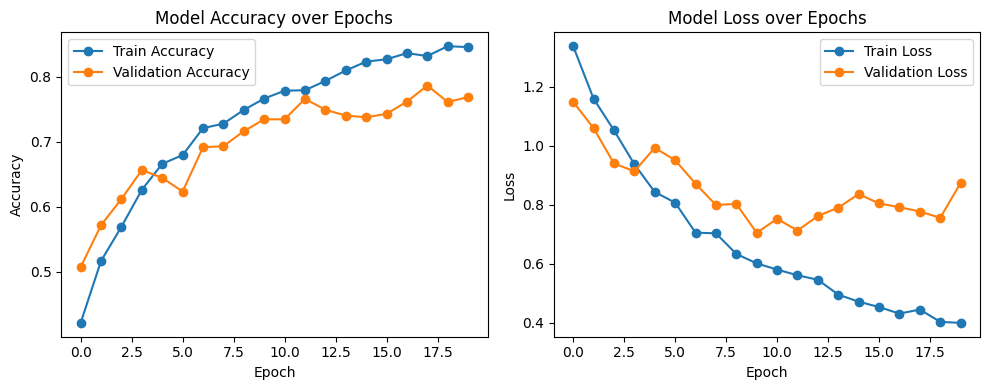

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Get true and predicted labels
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Labels
class_names = list(val_generator.class_indices.keys())

# Metrics
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 789ms/step
Precision: 0.1832
Recall:    0.1832
F1 Score:  0.1812


In [18]:
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

   Nail_psoriasis       0.27      0.26      0.26       504
          SJS-TEN       0.33      0.39      0.35       632
         Vitiligo       0.19      0.13      0.16       403
             acne       0.09      0.07      0.08       229
hyperpigmentation       0.04      0.06      0.05       140

         accuracy                           0.24      1908
        macro avg       0.18      0.18      0.18      1908
     weighted avg       0.23      0.24      0.23      1908



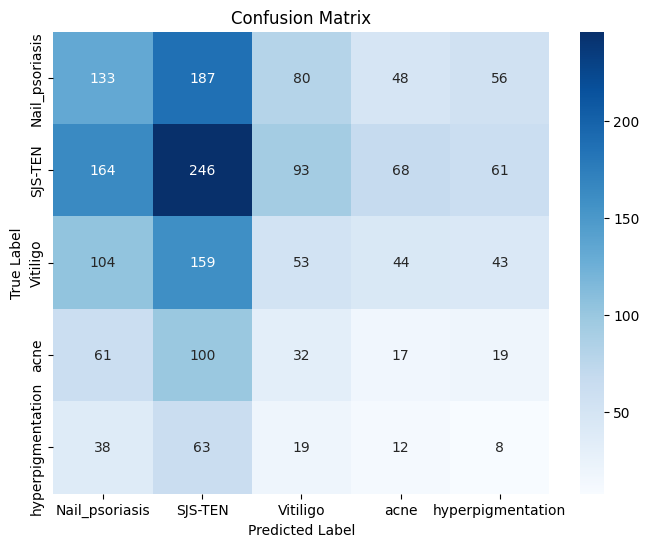

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


In [25]:
# Resize and flatten
X_flat = []
for img in images:
    img_resized = cv2.resize(img, (64, 64))  # Smaller size for classical ML models
    X_flat.append(img_resized.flatten())     # Flatten image

X_flat = np.array(X_flat)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)


In [27]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)


In [30]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=le.classes_))

evaluate_model("Decision Tree", y_test, y_dt_pred)
evaluate_model("Random Forest", y_test, y_rf_pred)



Decision Tree Results:
Accuracy: 0.5947643979057592
Classification Report:
                   precision    recall  f1-score   support

   Nail_psoriasis       0.69      0.65      0.67       504
          SJS-TEN       0.64      0.63      0.63       633
         Vitiligo       0.53      0.52      0.52       403
             acne       0.55      0.61      0.58       230
hyperpigmentation       0.39      0.44      0.41       140

         accuracy                           0.59      1910
        macro avg       0.56      0.57      0.56      1910
     weighted avg       0.60      0.59      0.60      1910


Random Forest Results:
Accuracy: 0.7827225130890052
Classification Report:
                   precision    recall  f1-score   support

   Nail_psoriasis       0.82      0.81      0.81       504
          SJS-TEN       0.70      0.91      0.79       633
         Vitiligo       0.81      0.65      0.72       403
             acne       0.93      0.76      0.84       230
hyperpigmentation 

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro'),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'f1': f1_score(y_true, y_pred, average='macro')
    }


In [32]:
metrics_dt = get_metrics(y_test, y_dt_pred)
metrics_rf = get_metrics(y_test, y_rf_pred)

metrics_cnn = get_metrics(y_true, y_pred)  


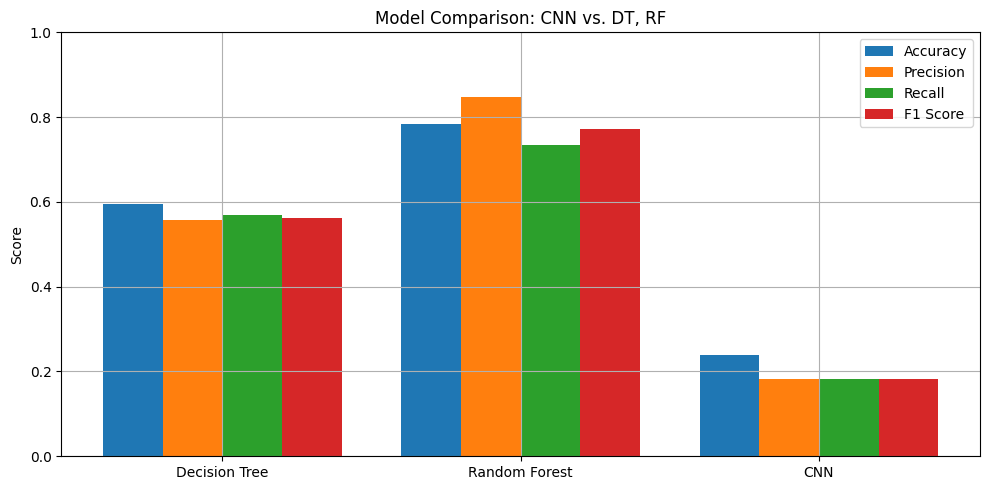

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Updated model names and metrics
model_names = ['Decision Tree', 'Random Forest', 'CNN']
accuracies = [metrics_dt['accuracy'], metrics_rf['accuracy'], metrics_cnn['accuracy']]
precisions = [metrics_dt['precision'], metrics_rf['precision'], metrics_cnn['precision']]
recalls = [metrics_dt['recall'], metrics_rf['recall'], metrics_cnn['recall']]
f1_scores = [metrics_dt['f1'], metrics_rf['f1'], metrics_cnn['f1']]

x = np.arange(len(model_names))
width = 0.2

plt.figure(figsize=(10, 5))

plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
plt.bar(x - 0.5*width, precisions, width, label='Precision')
plt.bar(x + 0.5*width, recalls, width, label='Recall')
plt.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Comparison: CNN vs. DT, RF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
